# Similar Research Paper Recommendation using `SBERT`

- The recommendation systems task is to produce a list of recommendations for a user.
- Recommendation systems try to show what user might like the most 

- This is a symmetric search task, as the search queries have the same length and content as the questions in the corpus.

- For a given research paper, this simple and easy recommendation system will suggest most similar papers

- We will use paper title and abstract to match similar papers

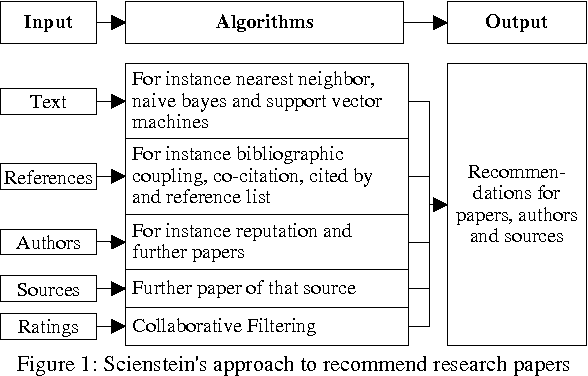

### SPECTER
- As model, we use SPECTER (https://github.com/allenai/specter), which encodes paper titles and abstracts 
into a vector space. https://arxiv.org/pdf/2004.07180.pdf

- SPECTER can be easily applied to
downstream applications without task-specific
fine-tuning

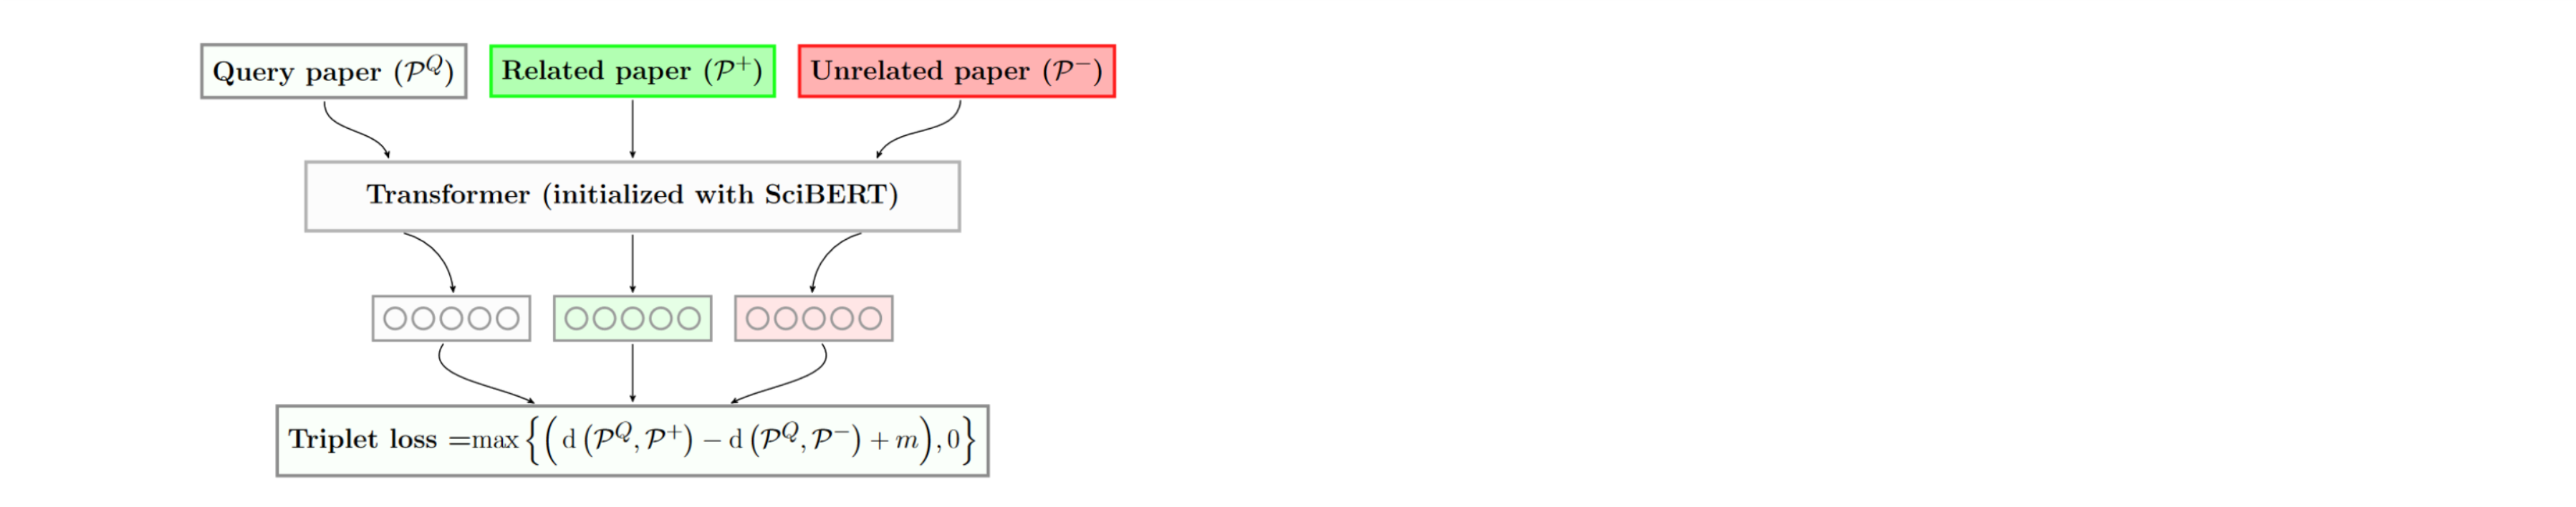

Dataset: https://sbert.net/datasets/emnlp2016-2018.json

In [1]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 4.7 MB/s 
     |████████████████████████████████| 5.8 MB 69.6 MB/s 
     |████████████████████████████████| 1.3 MB 62.5 MB/s 
     |████████████████████████████████| 182 kB 76.1 MB/s 
     |████████████████████████████████| 7.6 MB 65.8 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=fb482c095914f7b7056e4b1983fe0e427593ed4bf6495d9144663f8f9c83e563
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [2]:
from sentence_transformers import SentenceTransformer, util
import os
import json
import requests

In [3]:
response = requests.get('https://sbert.net/datasets/emnlp2016-2018.json')
papers = json.loads(response.text)

In [4]:
len(papers)

974

In [5]:
papers[0]

{'title': 'Rule Extraction for Tree-to-Tree Transducers by Cost Minimization',
 'abstract': 'Finite-state transducers give efficient representations of many Natural Language phenomena. They allow to account for complex lexicon restrictions encountered, without involving the use of a large set of complex rules difficult to analyze. We here show that these representations can be made very compact, indicate how to perform the corresponding minimization, and point out interesting linguistic side-effects of this operation.',
 'url': 'http://aclweb.org/anthology/D16-1002',
 'venue': 'EMNLP',
 'year': '2016'}

In [6]:
# https://www.sbert.net/docs/pretrained_models.html
model = SentenceTransformer('allenai-specter')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.71k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/622 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/462k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/331 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/222k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [7]:
paper_texts = [paper['title'] + '[SEP]' + paper['abstract'] for paper in papers]

In [8]:
corpus_embeddings = model.encode(paper_texts, convert_to_tensor=True, show_progress_bar=True)

Batches:   0%|          | 0/31 [00:00<?, ?it/s]

In [11]:
def search(title, abstract):
  query_embedding = model.encode(title + '[SEP]' + abstract, convert_to_tensor=True)

  search_hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=3)[0]
  #print(search_hits)
  print("Most Similar Papers\n")
  for hit in search_hits:
    related_paper = papers[hit['corpus_id']]
    print(related_paper['title'])
    print(related_paper['abstract'])
    print('\n\n')

In [12]:
title = 'Paradigm Shift in Natural Language Processing'
abstract = 'In the era of deep learning, modeling for most natural language processing (NLP) tasks has converged into several mainstream paradigms. For example, we usually adopt the sequence labeling paradigm to solve a bundle of tasks such as POS-tagging, named entity recognition (NER), and chunking, and adopt the classification paradigm to solve tasks like sentiment analysis. With the rapid progress of pre-trained language models, recent years have witnessed a rising trend of paradigm shift, which is solving one NLP task in a new paradigm by reformulating the task. The paradigm shift has achieved great success on many tasks and is becoming a promising way to improve model performance. Moreover, some of these paradigms have shown great potential to unify a large number of NLP tasks, making it possible to build a single model to handle diverse tasks. In this paper, we review such phenomenon of paradigm shifts in recent years, highlighting several paradigms that have the potential to solve different NLP tasks.'
search(title, abstract)

[{'corpus_id': 704, 'score': 0.9153361320495605}, {'corpus_id': 344, 'score': 0.8846307396888733}, {'corpus_id': 927, 'score': 0.881298303604126}]
Most Similar Papers

Learning Better Internal Structure of Words for Sequence Labeling
Character-based neural models have recently proven very useful for many NLP tasks. However, there is a gap of sophistication between methods for learning representations of sentences and words. While most character models for learning representations of sentences are deep and complex, models for learning representations of words are shallow and simple. Also, in spite of considerable research on learning character embeddings, it is still not clear which kind of architecture is the best for capturing character-to-word representations. To address these questions, we first investigate the gaps between methods for learning word and sentence representations. We conduct detailed experiments and comparisons of different state-of-the-art convolutional models, and a